<a href="https://colab.research.google.com/github/aymnblh/Machine-Learning/blob/main/heart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data=pd.read_csv("/content/heart.csv",sep = ',')
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [ ]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


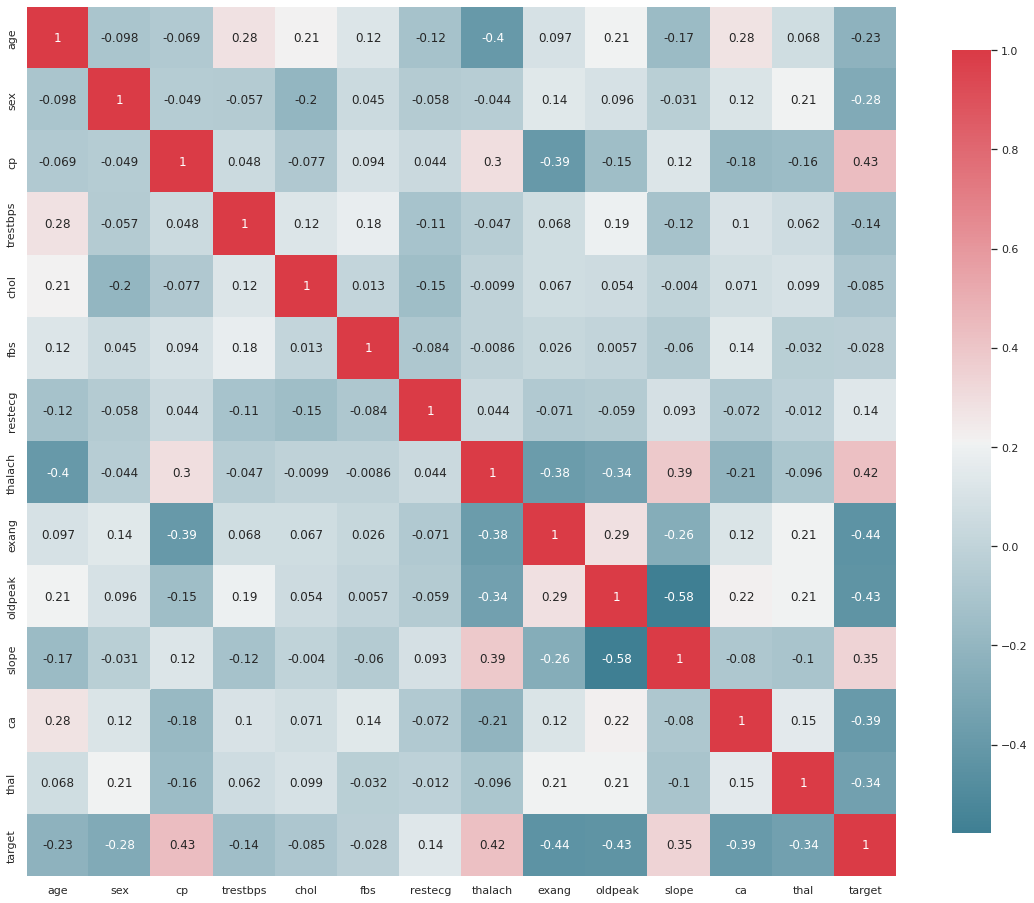

In [ ]:
def plot_correlation_map( data ):

    corr = data.corr()

    s , ax = plt.subplots( figsize =( 20 , 16 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr,

        cmap = cmap,

        square=True,

        cbar_kws={ 'shrink' : .9 },

        ax=ax,

        annot = True,

        annot_kws = { 'fontsize' : 12 }
    )
plot_correlation_map(data)

the histogram show the importance of age in the survival of the individuals

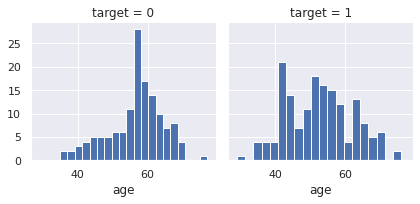

In [ ]:
import matplotlib.pyplot as plt
cor=sns.FacetGrid(data,col='target')
cor.map(plt.hist,'age',bins=20)

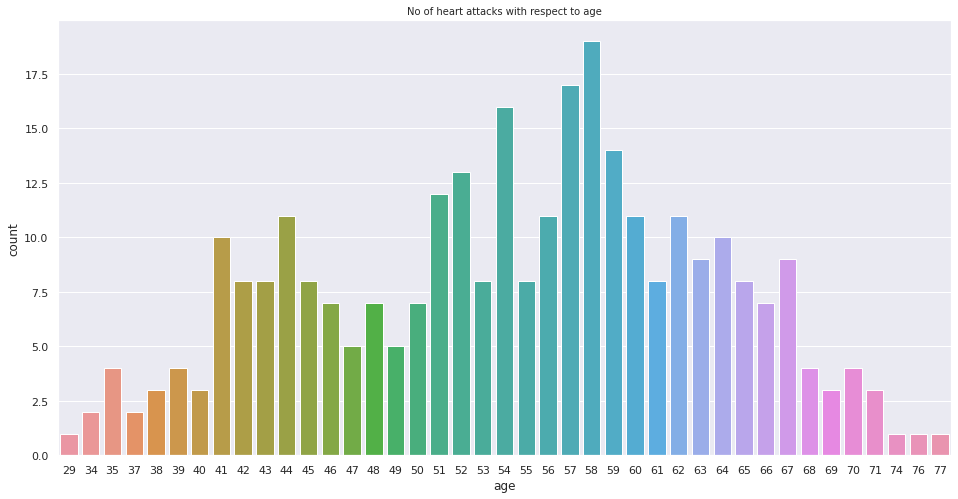

In [ ]:
import seaborn as sns
plt.figure(figsize=(16,8))
plt.title("No of heart attacks with respect to age", fontsize = 10);
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=data["age"])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


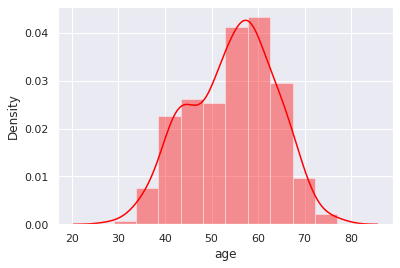

In [ ]:
sns.distplot(data["age"],bins=10,hist=True,kde=True,color='red')

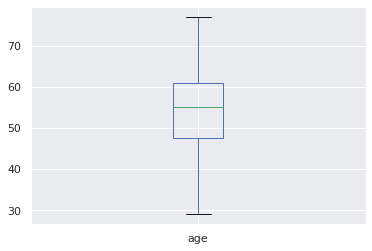

In [ ]:
data["age"].plot.box()

the histogram show the importance of sex in the survival of the individuals

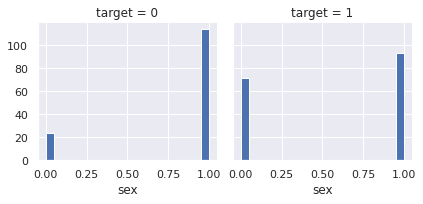

In [ ]:
cor=sns.FacetGrid(data,col='target')
cor.map(plt.hist,'sex',bins=20)

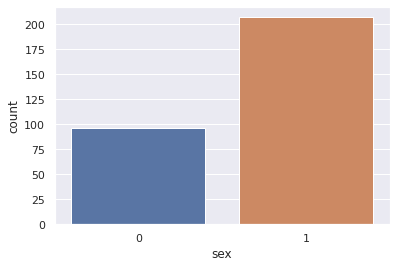

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")
ax = sns.countplot(x=data["sex"])

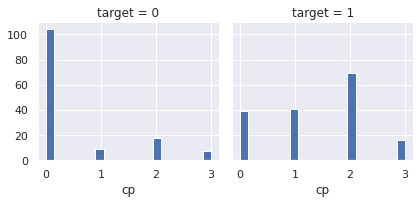

In [ ]:
cor=sns.FacetGrid(data,col='target')
cor.map(plt.hist,'cp',bins=20)

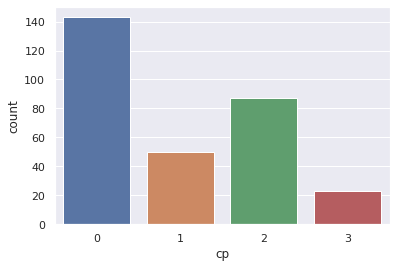

In [ ]:
import seaborn as sns
ax = sns.countplot(x=data["cp"])

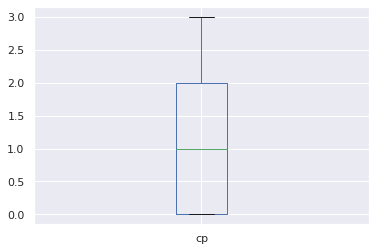

In [ ]:
data["cp"].plot.box()

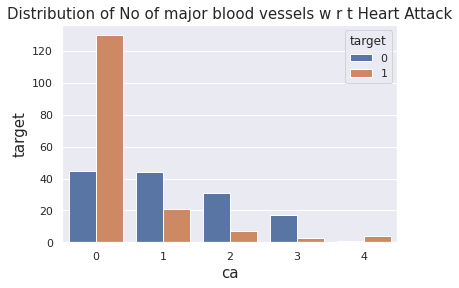

In [ ]:
target_data = data.target.map({1: 'higher chances of heart attack', 0: 'lesser chances of heart attack'})
sns.countplot(x = data["ca"], hue = data["target"], data = data)
plt.title("Distribution of No of major blood vessels w r t Heart Attack" , fontsize= 15)
plt.xlabel('ca',fontsize = 15)
plt.ylabel('target',fontsize = 15);

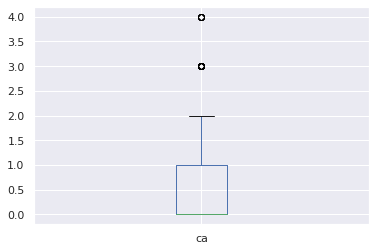

In [ ]:
data["ca"].plot.box()

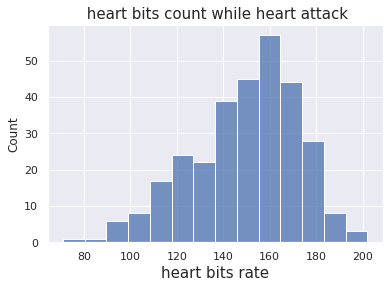

In [ ]:
sns.histplot(x = data['thalach'], data = data)
plt.title(' heart bits count while heart attack', fontsize = 15)
plt.xlabel('heart bits rate', fontsize = 15);

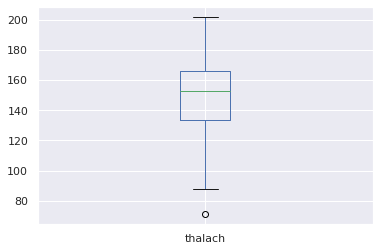

In [ ]:
data["thalach"].plot.box()

Desision tree

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
x = data[["age",	"sex",	"cp",	"thalach",	"exang",	"oldpeak",	"slope",	"ca",	"thal"]]
y = data["target"]
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=27)

tree = tree.DecisionTreeClassifier()
tree.fit(x_train, y_train)
y_pred=tree.predict(x_test)
print("score:{}".format(accuracy_score(y_test, y_pred)))

score:0.8421052631578947


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        35
           1       0.91      0.78      0.84        41

    accuracy                           0.84        76
   macro avg       0.85      0.85      0.84        76
weighted avg       0.85      0.84      0.84        76



In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics
confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))

[[32  3]
 [ 9 32]]


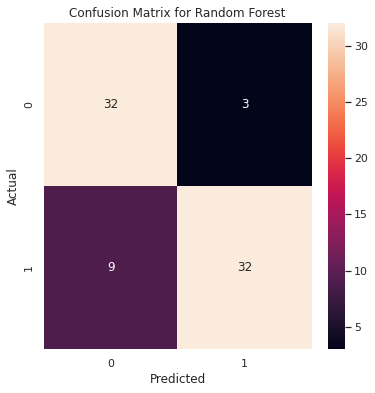

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob= tree.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score1)

0.8473867595818816


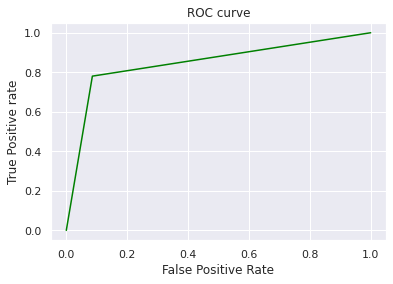

In [ ]:
plt.plot(fpr1, tpr1,color='green')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
clf=RandomForestClassifier(n_estimators=10)
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8421052631578947


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.89      0.84        35
           1       0.89      0.80      0.85        41

    accuracy                           0.84        76
   macro avg       0.84      0.85      0.84        76
weighted avg       0.85      0.84      0.84        76



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))

[[31  4]
 [ 8 33]]


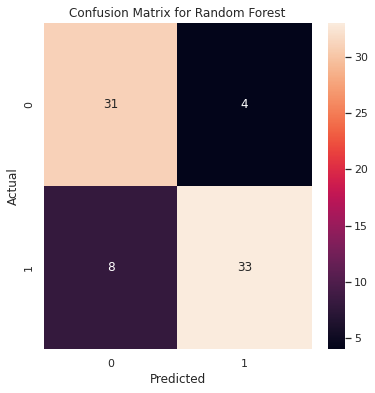

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Random Forest")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob= clf.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score1)

0.9118466898954704


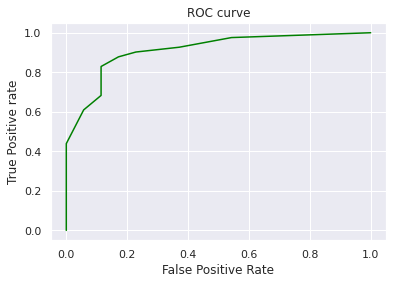

In [ ]:
plt.plot(fpr1, tpr1,color='green')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()

Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=27)
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred  = logreg.predict(x_test)
print("Accuracy={:.2f}".format(logreg.score(x_test, y_test)))

Accuracy=0.87


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.88      0.86        42
           1       0.89      0.86      0.88        49

    accuracy                           0.87        91
   macro avg       0.87      0.87      0.87        91
weighted avg       0.87      0.87      0.87        91



In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)
print(metrics.confusion_matrix(y_test, y_pred, labels=[0,1]))

[[37  5]
 [ 7 42]]


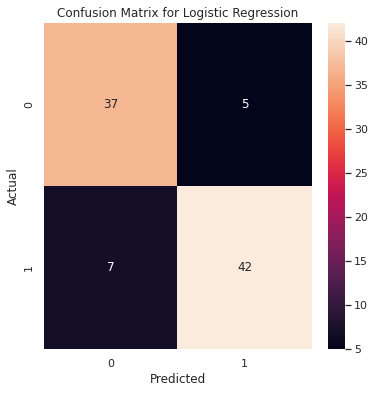

In [ ]:
conf_mat=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,6))
sns.heatmap(conf_mat,annot=True,fmt=".0f")
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred_prob= logreg.predict_proba(x_test)
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob[:,1], pos_label=1)
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
auc_score1 = roc_auc_score(y_test, pred_prob[:,1])
print(auc_score1)

0.9295432458697764


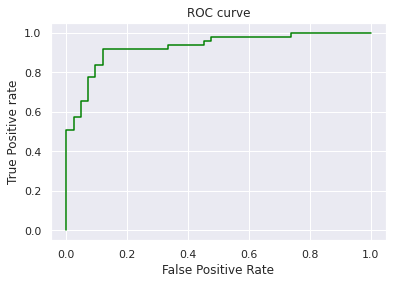

In [ ]:
plt.plot(fpr1, tpr1,color='green')
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive rate')
plt.show()